## Demo for hub.py for DevSummit 2022

In [1]:
pip install -e git+https://github.com/esridc/hub-py.git#egg=arcgishub

Obtaining arcgishub from git+https://github.com/esridc/hub-py.git#egg=arcgishub
  Cloning https://github.com/esridc/hub-py.git to ./src/arcgishub
  Running command git clone -q https://github.com/esridc/hub-py.git /arcgis/src/arcgishub
  Running setup.py develop for arcgishub
Note: you may need to restart the kernel to use updated packages.


Remember to restart kernel after installing hubpy, in order to import it.

In [1]:
from arcgishub.hub import Hub

### Login to Hub

In [2]:
myhub = Hub("https://www.arcgis.com", "mmajumdar_dcdev")

Enter password: ········


### Searching for Initiatives

You can search for initiatives or filter using parameters such as `title`, `owner`, `tags`

In [3]:
myhub.initiatives.search(title='community')

[<Initiative title:"Community Test" owner:brollison_dcdev>,
 <Initiative title:"Increase Community Pride - Graham" owner:ghudgins5>,
 <Initiative title:"Increase Community Pride Hamhands" owner:phammons_dcdev>,
 <Initiative title:"Increase Community Pride - v181203" owner:ghudgins5>,
 <Initiative title:"Racial Equity Community Outreach" owner:jdev_dcdev>,
 <Initiative title:"Increase Community Pride - v190318" owner:ghudgins5>,
 <Initiative title:"Increase Community Pride" owner:ghudgins5>,
 <Initiative title:"Racial Equity Community Outreach" owner:mmajumdar_dcdev>,
 <Initiative title:"Community User Sign-Up" owner:brollison_dcdev>,
 <Initiative title:"Community Parks Site" owner:KThompson_dcdev>,
 <Initiative title:"Community User Sign-Up" owner:brollison_dcdev>]

### Creating an initiative

In [4]:
i1 = myhub.initiatives.add(title='Initiative for devsummit 2022')
i1.item

<Item title:"Initiative for devsummit 2022" type:Hub Initiative owner:mmajumdar_dcdev>

### Fetching the site for this initiative 

The site can be fetched using the `site_id` property of the initiative.

In [5]:
s1 = myhub.sites.get(i1.site_id)
s1

<Site title:"Initiative for devsummit 2022" owner:mmajumdar_dcdev>

Sites can also be fetched using the item id of the site for Hub Basic and Enterprise Sites.

<Item title:"Urban Analytics Techniques" type:Hub Site Application owner:mmajumdar_dcdev>
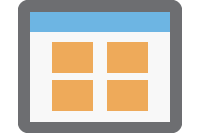

In [6]:
s2 = myhub.sites.get('6c477621242e47259577b19c5cf04c0d')
s2.item

### Linking a page to this site

Linking a page to a site is a two step process. You start by fetching the page of interest, and then linking it to the site object with a slug for the page.

<Item title:"page space" type:Hub Page owner:mmajumdar_dcdev>
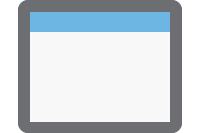

In [7]:
#Fetching a page
new_page = myhub.pages.get('1c75da020b2f4943a3f657ef59fc1bc8')
new_page.item

In [8]:
s1.pages.link(new_page, slug='linked page space')
s1.pages.search()

[<Page title:"page space" owner:mmajumdar_dcdev>]

### Editing the layout of this site

We start by fetching the layout of the this site.

In [9]:
layout = s1.layout

In [10]:
layout.sections[1].style.background.color

'#3276ae'

As we see, this section has a blue background color.

![image](https://user-images.githubusercontent.com/13968196/158464500-fbb3fa83-f091-41ba-b2eb-740a633a2078.png)


We now change it to a deep red by assigning the value and then calling the `update_layout` method on the site object.

In [12]:
layout.sections[1].style.background.color = '#800000'
layout.sections[1].style.background.color

'#800000'

In [13]:
s1.update_layout(layout)

True

As we see the color has successfully changed.

![image](https://user-images.githubusercontent.com/13968196/158464917-76a90219-127b-4a74-ac3e-4c70de62f3e4.png)


### Editing title on the site

We can see the title of this site is 'New Initiative'.

![image](https://user-images.githubusercontent.com/13968196/158465157-4a16a154-eccd-4050-a33b-1afaed08f5d3.png)

We proceed with fetching the card for this section, and then updating it with the json for the new title 'DevSummit 2022'.

In [15]:
layout.sections[0].rows[0].cards[0]

{'component': {'name': 'markdown-card', 'settings': {'markdown': " <br> <br> <br> <br> <br><h1 style='text-align: center; '>New Initiative</h1><p style='text-align: center; '><br></p><p style='text-align: center; '><br></p><p style='text-align: center; '>What will this initiative achieve if successful?</p> <br> <br> <br> <br> <br>"}}, 'width': 12, 'showEditor': False}

In [16]:
layout.sections[0].rows[0].cards[0] = {'component': {'name': 'markdown-card', 'settings': {'markdown': " <br> <br> <br> <br> <br><h1 style='text-align: center; '>DevSummit 2022</h1><p style='text-align: center; '><br></p><p style='text-align: center; '><br></p><p style='text-align: center; '>What will this initiative achieve if successful?</p> <br> <br> <br> <br> <br>"}}, 'width': 12, 'showEditor': False}
layout.sections[0].rows[0].cards[0]

{'component': {'name': 'markdown-card',
  'settings': {'markdown': " <br> <br> <br> <br> <br><h1 style='text-align: center; '>DevSummit 2022</h1><p style='text-align: center; '><br></p><p style='text-align: center; '><br></p><p style='text-align: center; '>What will this initiative achieve if successful?</p> <br> <br> <br> <br> <br>"}},
 'width': 12,
 'showEditor': False}

In [17]:
s1.update_layout(layout)

True

And the title has successfully changed.

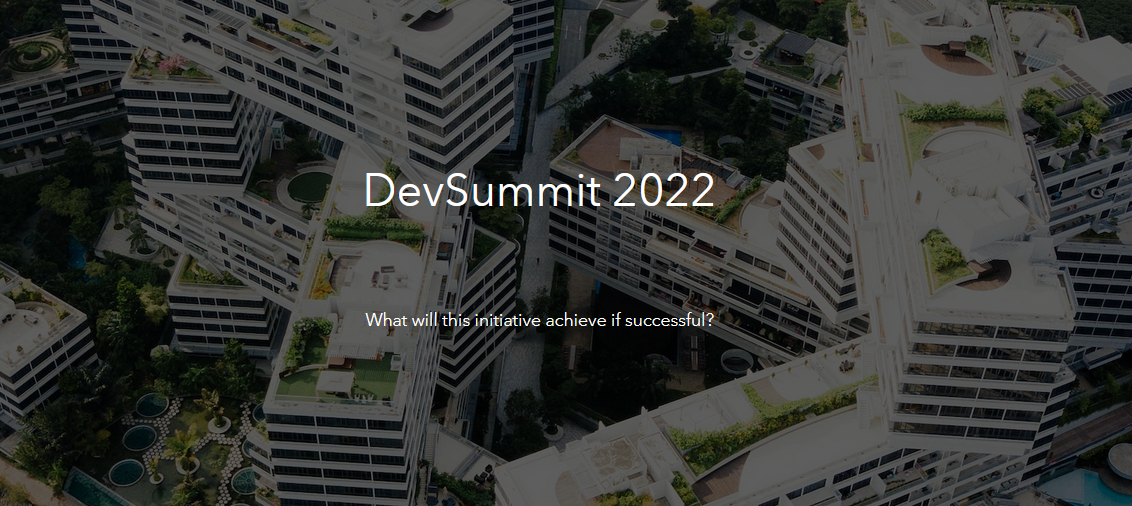

### Fetching sites with site domain

Sites can be fetched by their itemid. But in case you do not have the siteid for a site that you have access to, you can fetch the item as follows:

<Item title:"Open Data DC" type:Hub Site Application owner:DCGISopendata>
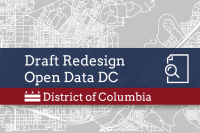

In [18]:
dc = myhub.sites.get_by_domain('opendata.dc.gov')
dc.item

### Cloning an initiative/site in the same org

We clone an initiaitve in the same org by passing the initiative object to the clone method.

In [19]:
i1_clone = myhub.initiatives.clone(i1)
i1_clone.item

<Item title:"Initiative for devsummit 2022-copy-1647375955595" type:Hub Initiative owner:mmajumdar_dcdev>

### Cloning an initiative/site in another org

Cloning an initiative to another org requires signing into that org and then cloning the initiative into it, by calling the clone method on the `initiatives` property of the target hub object and also providing a reference to the initiative object and origin hub where the initiative belongs.

In [20]:
hub_basic = Hub("https://prod-bas-hub.maps.arcgis.com", "prod_bas_hub_admin")

Enter password: ········


In [21]:
i1_basic = hub_basic.initiatives.clone(i1, origin_hub=myhub, title='DevSummit 2022 site')
i1_basic.item

<Item title:"DevSummit 2022 site" type:Hub Site Application owner:prod_bas_hub_admin>

As we notice here, only the site item has been cloned in the new org since this is a Hub Basic org. The script understands whether to give you an initiative or site for your particular Hub.